<a href="https://colab.research.google.com/github/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/blob/main/LSTM_Twitter_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imorting Libraries

In [13]:
import os
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from joblib import dump, load

# Reading the dataset

In [14]:
text = []
clas = []
df = pd.read_csv('https://raw.githubusercontent.com/shakil1819/NLTK-LSTM-Based-Hate-Speech-Detection/main/Dataset/labeled_data.csv')
text = df['tweet'].tolist()
clas = df['class'].tolist()
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


# creating a new dataframe for easy text processing

In [15]:
df = pd.DataFrame({'tweet': text, 'class': clas})

# Finding if there is any missing data

In [16]:
print(df.isnull().sum())

tweet    0
class    0
dtype: int64


# Converting the data into lower case.

In [17]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

# removing punctuations

In [18]:
punctuation_signs = list("?:!.,;")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-18-35e9cba6c040>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


# Removing '\n' and '\t', extra spaces, quoting text, and progressive pronouns.

In [19]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

# removing stop-words

In [20]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-20-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


# Using Bag of Words approach for final data Preparation.¶

In [21]:
cv = CountVectorizer(max_features = 75)
X = cv.fit_transform(df['tweet']).toarray()
y = df['class']

# Splitting the Data using Stratified split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, stratify=y, random_state = 42)

In [23]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                              cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Using Random Forest Classifier as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8392737054472091


['rf.joblib']

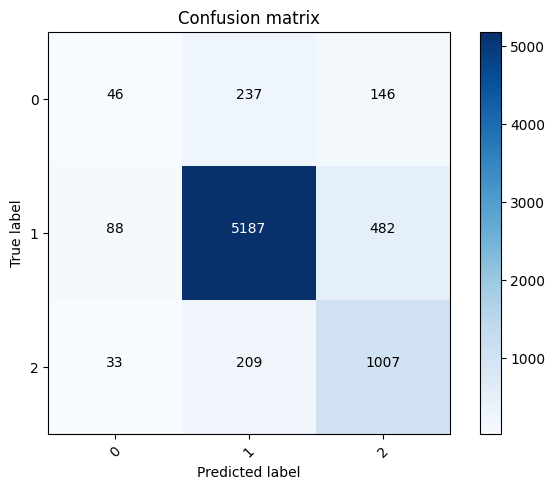

In [24]:
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'rf.joblib')

# Using Decision tree as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8217888365837256


['decision.joblib']

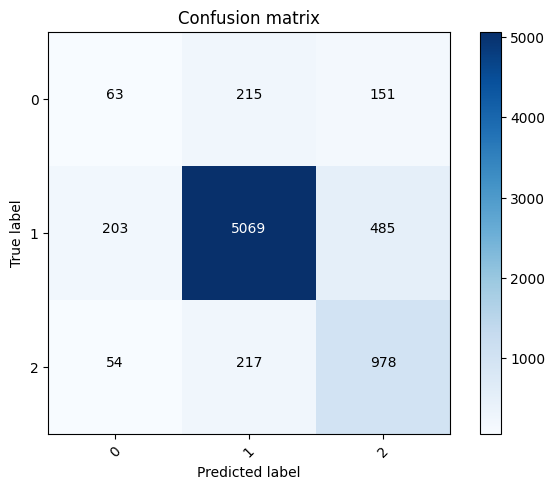

In [25]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'decision.joblib')

# Using AdaBoost Classifier as the Model and printing evaluating it using confusion matrix

accuracy is:  0.8468056489576328


['ada.joblib']

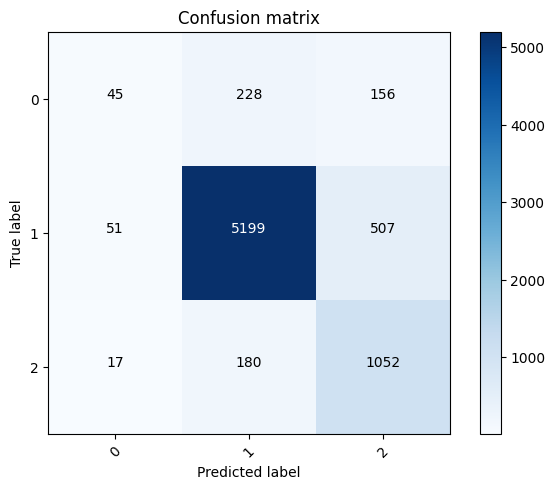

In [26]:
clf = AdaBoostClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(CM, classes = range(3))
dump(clf, 'ada.joblib')

# Converting the labels into categorical format

In [27]:
y_train=to_categorical(y_train, num_classes = 3, dtype='float32')
y_test=to_categorical(y_test, num_classes = 3, dtype='float32')

# Creating and Training an LSTM Model

In [28]:
model = Sequential()
model.add(Embedding(232337, 100, input_length=X_train.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(20, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(3, activation='softmax'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 25
batch_size = 64

history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
272/272 [==============================] - 195s 702ms/step - loss: 0.4236 - accuracy: 0.7672 - val_loss: 0.4024 - val_accuracy: 0.7743
Epoch 2/25
272/272 [==============================] - 190s 698ms/step - loss: 0.4022 - accuracy: 0.7743 - val_loss: 0.4016 - val_accuracy: 0.7743
Epoch 3/25
272/272 [==============================] - 188s 692ms/step - loss: 0.4014 - accuracy: 0.7743 - val_loss: 0.4018 - val_accuracy: 0.7743
Epoch 4/25
272/272 [==============================] - 191s 700ms/step - loss: 0.4010 - accuracy: 0.7743 - val_loss: 0.3968 - val_accuracy: 0.7743
Epoch 5/25
272/272 [==============================] - 190s 697ms/step - loss: 0.3933 - accuracy: 0.7743 - val_loss: 0.3878 - val_accuracy: 0.7743
Epoch 6/25
272/272 [==============================] - 183s 675ms/step - loss: 0.3912 - accuracy: 0.7744 - val_loss: 0.3867 - val_accuracy: 0.7744
Epoch 7/25
272/272 [==============================] - 186s 683ms/step - loss: 0.3859 - accuracy: 0.7746 - val_loss: 0.3546 -

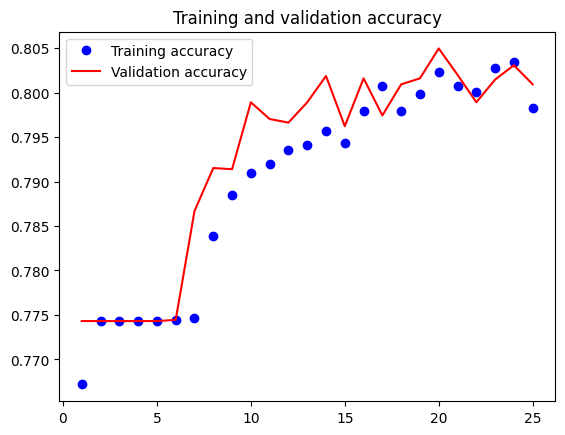

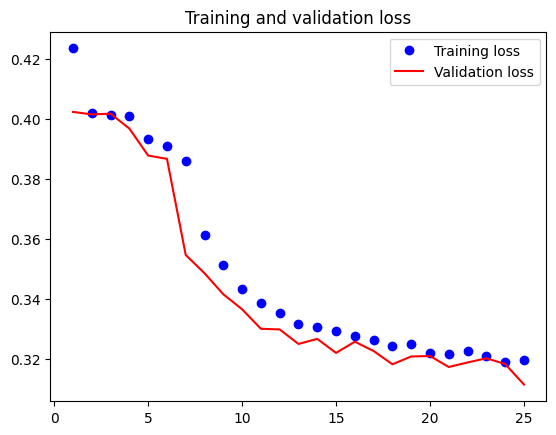

In [29]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Saving the LSTM Model

In [30]:
model.save('lstm.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
